In [1]:
import json
import pandas as pd

#myPath = "../data/tqa_train_val_test/train/tqa_v1_train.json"

myPath =["../data/tqa_train_val_test/train/tqa_v1_train.json", 
         "../data/tqa_train_val_test/test/tqa_v2_test.json", 
         "../data/tqa_train_val_test/val/tqa_v1_val.json"]
for one_path in myPath:
    # Load the JSON file
    with open(one_path) as f:
        data = json.load(f)
        print(f"\n{one_path.split('/')[-1].split('.')[0].upper()}\n{'-'*30}\n")
        # Check the first few records
        print(data[0])  # or use pd.DataFrame(data).head() for a tabular view


TQA_V1_TRAIN
------------------------------

{'adjunctTopics': {'Apply Concepts': {'content': {'figures': [], 'mediaLinks': [], 'text': '5. A glacier is melting. What are all of the scientists you can think of who might be involved in studying this glacier? What would each of them do? '}, 'orderID': 't_12'}, 'Introduction': {'content': {'figures': [{'caption': 'FIGURE 1.10 Earth as seen from Apollo 17.', 'imagePath': 'textbook_images/earth_science_and_its_branches_20010.png'}], 'mediaLinks': [], 'text': 'Earth Science is the study of all aspects of our planet Earth. Earth Science is not just about the molten lava, icy mountain peaks, steep canyons and towering waterfalls of the continents. Earth Science includes the atmosphere and oceans. The field also looks out into the solar system, galaxy, and universe. Earth scientists seek to understand the beautiful planet on which we depend (Figure 1.10). Different branches of Earth Science study one particular part of Earth. Since all of the 

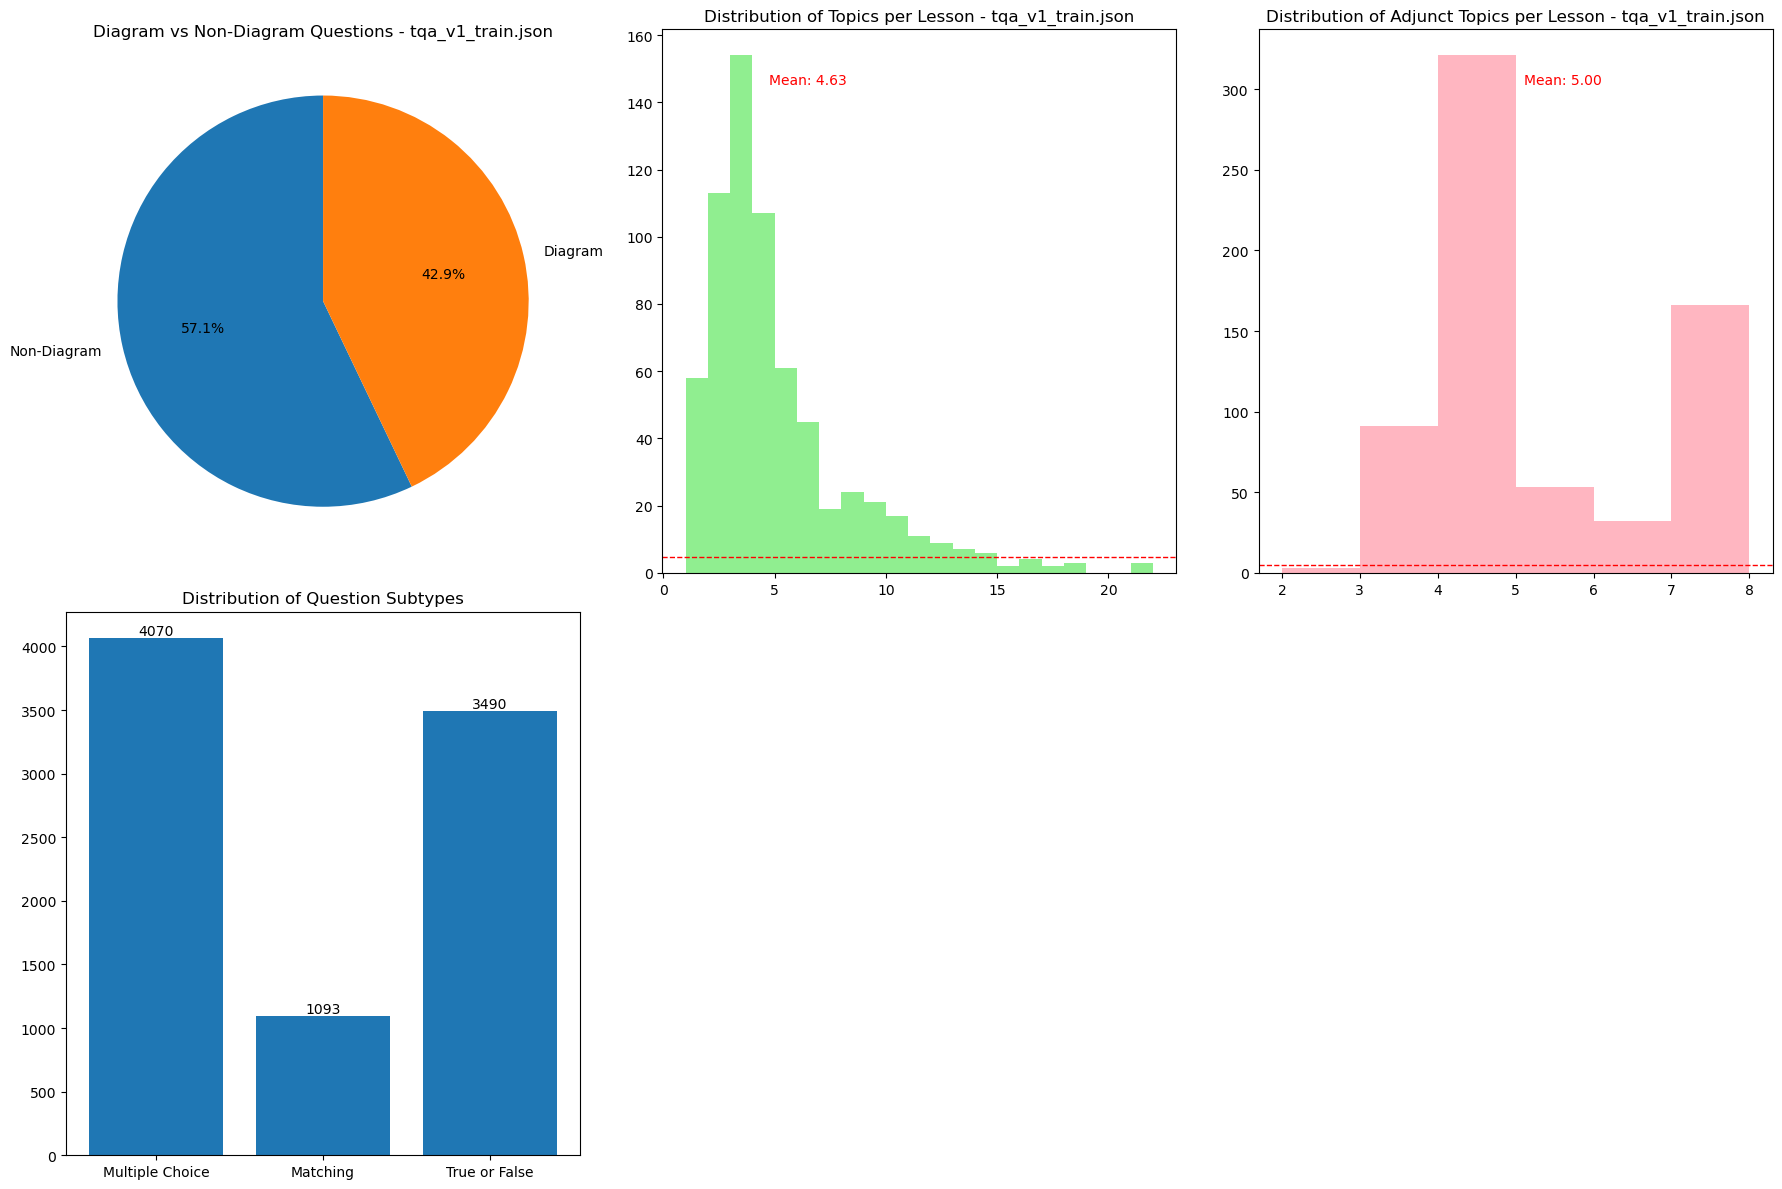

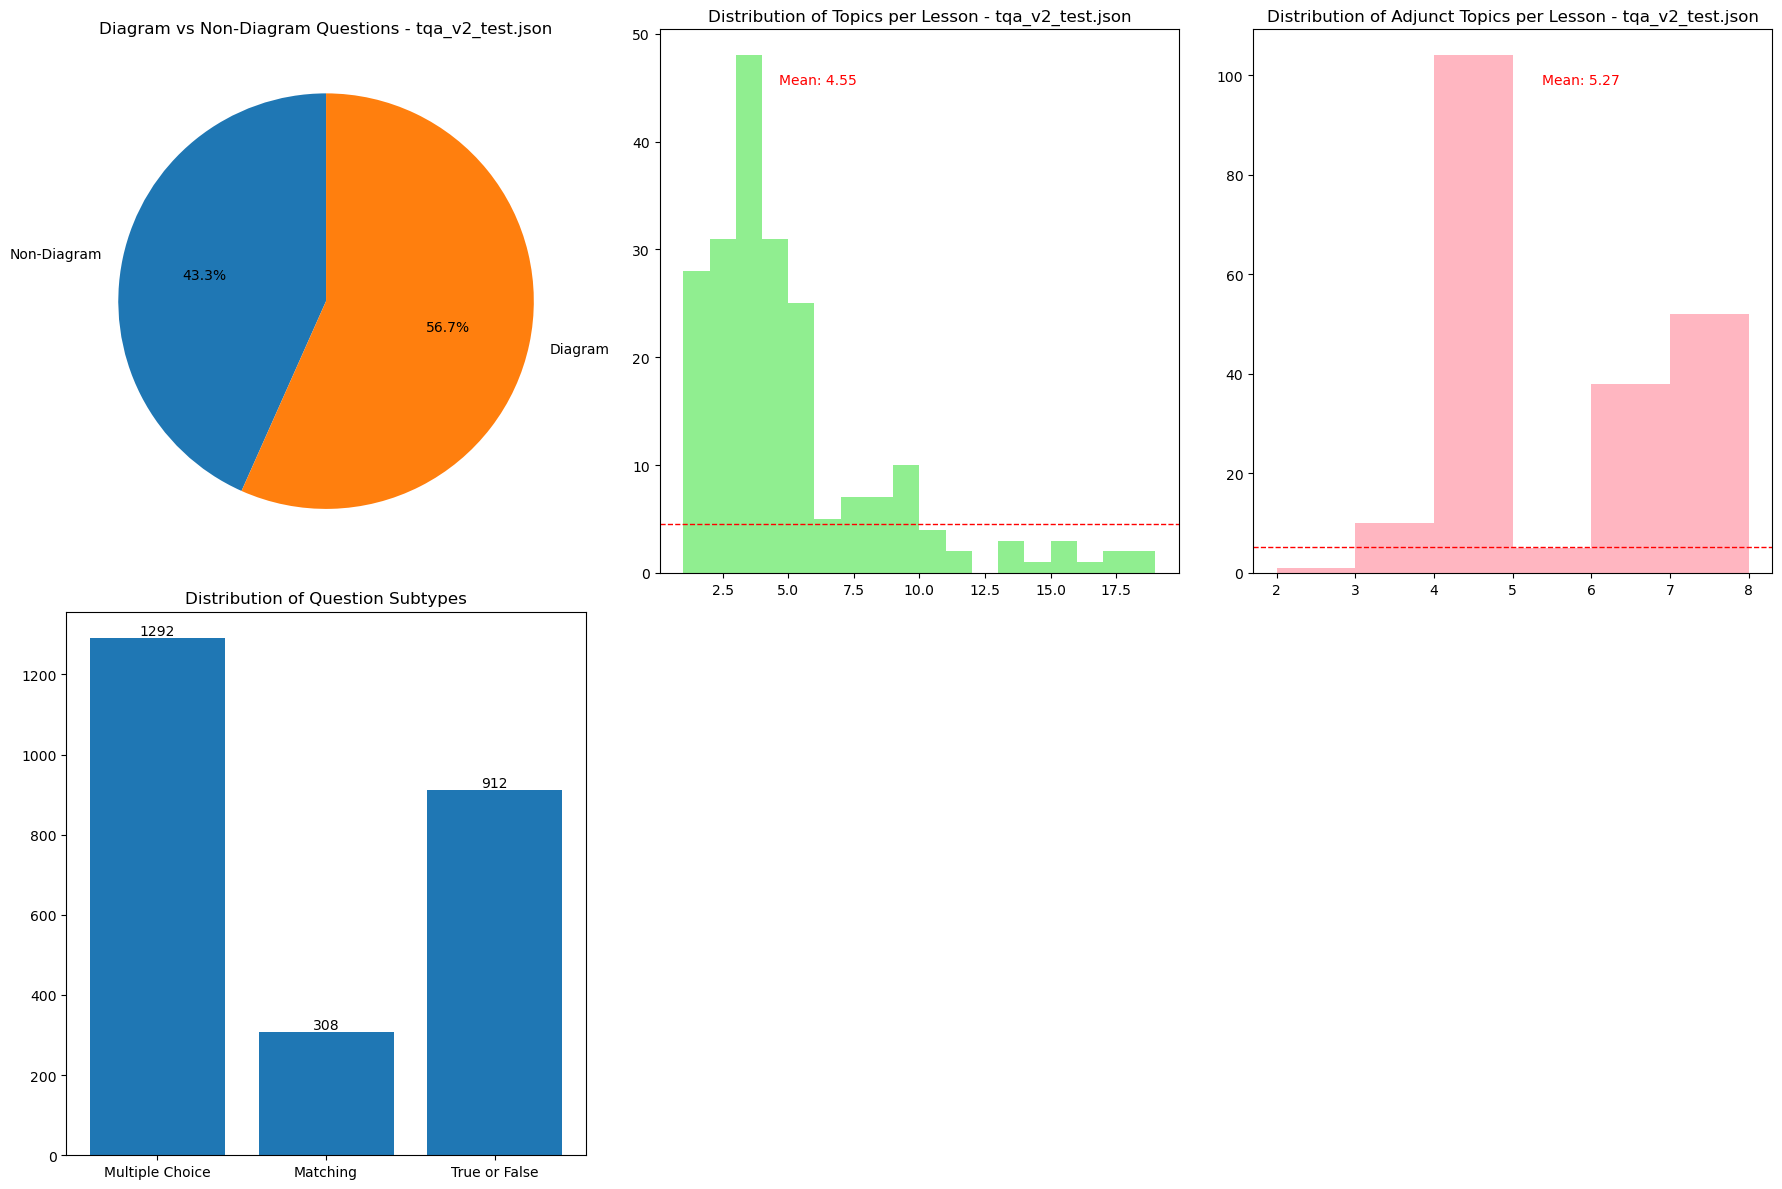

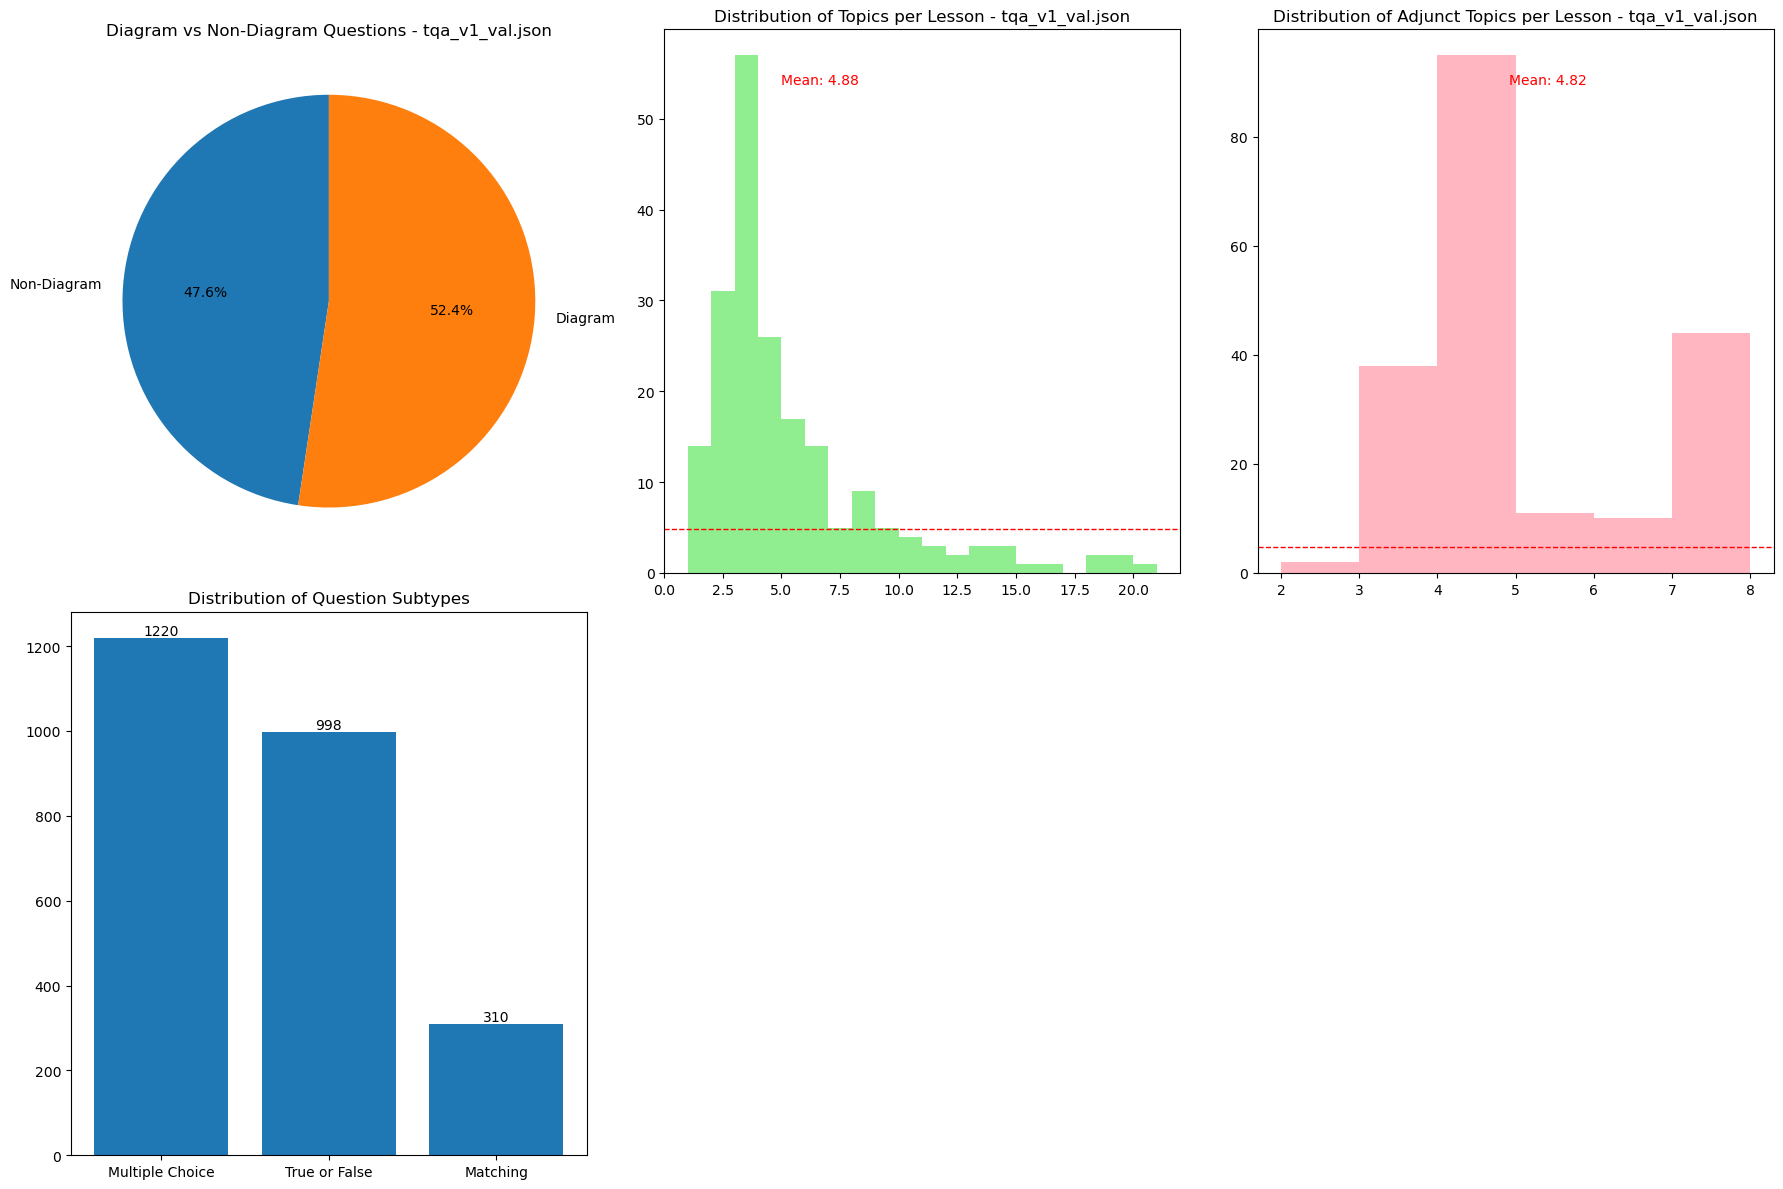


EDA Summary:


,File,Lessons,Non-Diagram Q,Diagram Q,Topics,Adjunct Topics,Diagrams,Annotations,Most Common Answer Choices,Question Subtypes
0,tqa_v1_train.json,666,8653,6501,3084,3333,185,1096,"[(a, 8643), (b, 8642), (c, 5172), (d, 5171), (...","{'Multiple Choice': 4070, 'Matching': 1093, 'T..."
1,tqa_v2_test.json,210,2512,3285,955,1107,31,515,"[(a, 2508), (b, 2508), (d, 1604), (c, 1603), (...","{'Multiple Choice': 1292, 'Matching': 308, 'Tr..."
2,tqa_v1_val.json,200,2528,2781,976,964,60,463,"[(a, 2524), (b, 2523), (c, 1533), (d, 1532), (...","{'Multiple Choice': 1220, 'True or False': 998..."



Most Common Answer Choices:
File: tqa_v1_train.json
Most Common Answer Choices: [('a', 8643), ('b', 8642), ('c', 5172), ('d', 5171), ('e', 1096)]
--------------------------------------------------
File: tqa_v2_test.json
Most Common Answer Choices: [('a', 2508), ('b', 2508), ('d', 1604), ('c', 1603), ('e', 308)]
--------------------------------------------------
File: tqa_v1_val.json
Most Common Answer Choices: [('a', 2524), ('b', 2523), ('c', 1533), ('d', 1532), ('e', 312)]
--------------------------------------------------


In [2]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from pandas import json_normalize
import numpy as np

# Initialize a list to store EDA results
eda_results = []

def eda_on_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Flatten JSON structure
    flattened_data = json_normalize(data, sep='_')
    lesson_count = len(data)

    # Counting non-diagram and diagram questions
    non_diagram_q_count = sum(len(lesson['questions'].get('nonDiagramQuestions', {})) for lesson in data)
    diagram_q_count = sum(len(lesson['questions'].get('diagramQuestions', {})) for lesson in data)
    
    # Counting topics and adjunct topics
    topics_per_lesson = [len(lesson.get('topics', [])) for lesson in data]
    adjunct_topics_per_lesson = [len(lesson.get('adjunctTopics', [])) for lesson in data]
    
    # Counting instructional diagrams and annotations
    instructional_diagram_count = sum(len(lesson.get('instructionalDiagrams', {})) for lesson in data)
    annotation_count = sum(len(lesson.get('diagramAnnotations', {})) for lesson in data)
    
    # Counting answer choices
    answer_choices = []
    correct_answers = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0}  # Track correct answers counts
    question_subtypes = Counter()

    # Initialize a list to store question subtypes
    question_subtypes_list = []

    for lesson in data:
        # Counting non-diagram questions
        for question in lesson['questions'].get('nonDiagramQuestions', {}).values():
            question_type = question.get('questionType', 'Unknown')
            question_subtypes[question_type] += 1
            
            # Count answer choices
            answer_choices.extend(question.get('answerChoices', {}).keys())
            
            # Extract correct answer and ensure it's a string
            correct_answer = question.get('correctAnswer', '')
            if isinstance(correct_answer, dict):
                correct_answer = correct_answer.get('value', '')  # If it's a dict, extract the 'value'
            
            if correct_answer in correct_answers:
                correct_answers[correct_answer] += 1
            
            # Append question subtypes to the list
            if 'questionSubType' in question:
                question_subtypes_list.append(question['questionSubType'])

    # Count the frequency of each question subtype
    subtype_counts = Counter(question_subtypes_list)

    # Count the most common answer choices
    answer_choice_counts = Counter(answer_choices)
    most_common_answers = answer_choice_counts.most_common(5)

    # Store results for the current file
    eda_results.append({
        "File": file_path.split("/")[-1],
        "Lessons": lesson_count,
        "Non-Diagram Q": non_diagram_q_count,
        "Diagram Q": diagram_q_count,
        "Topics": sum(topics_per_lesson),
        "Adjunct Topics": sum(adjunct_topics_per_lesson),
        "Diagrams": instructional_diagram_count,
        "Annotations": annotation_count,
        "Most Common Answer Choices": most_common_answers,
        "Question Subtypes": dict(subtype_counts)
    })

    # Plotting
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    
    # Pie chart for diagram vs non-diagram questions
    axs[0, 0].pie([non_diagram_q_count, diagram_q_count], labels=["Non-Diagram", "Diagram"], autopct='%1.1f%%', startangle=90)
    axs[0, 0].set_title(f"Diagram vs Non-Diagram Questions - {file_path.split('/')[-1]}")
    
    # Distribution of topics per lesson (light green bars)
    axs[0, 1].hist(topics_per_lesson, bins=range(min(topics_per_lesson), max(topics_per_lesson) + 1), color='lightgreen')
    axs[0, 1].set_title(f"Distribution of Topics per Lesson - {file_path.split('/')[-1]}")
    mean_topics = np.mean(topics_per_lesson)
    axs[0, 1].axhline(mean_topics, color='red', linestyle='dashed', linewidth=1)
    axs[0, 1].text(mean_topics + 0.1, axs[0, 1].get_ylim()[1] * 0.9, f'Mean: {mean_topics:.2f}', color='red')

    # Distribution of adjunct topics per lesson (light pink bars)
    axs[0, 2].hist(adjunct_topics_per_lesson, bins=range(min(adjunct_topics_per_lesson), max(adjunct_topics_per_lesson) + 1), color='lightpink')
    axs[0, 2].set_title(f"Distribution of Adjunct Topics per Lesson - {file_path.split('/')[-1]}")
    mean_adjunct_topics = np.mean(adjunct_topics_per_lesson)
    axs[0, 2].axhline(mean_adjunct_topics, color='red', linestyle='dashed', linewidth=1)
    axs[0, 2].text(mean_adjunct_topics + 0.1, axs[0, 2].get_ylim()[1] * 0.9, f'Mean: {mean_adjunct_topics:.2f}', color='red')
    
    # Distribution of question subtypes (4th panel)
    axs[1, 0].bar(subtype_counts.keys(), subtype_counts.values())
    axs[1, 0].set_title("Distribution of Question Subtypes")
    for bar in axs[1, 0].patches:
        axs[1, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
                       ha="center", va="bottom")
    
    axs[1, 1].axis('off')  # Empty panel

    axs[1, 2].axis('off')  # Empty panel

    plt.tight_layout()
    plt.show()

# Run EDA for each JSON file
for file in myPath:
    eda_on_json(file)

# Convert results to DataFrame
eda_df = pd.DataFrame(eda_results)

# Display summary
print("\nEDA Summary:")
display(eda_df)

# Most common answer choices across all files
print("\nMost Common Answer Choices:")
for result in eda_results:
    print(f"File: {result['File']}")
    print(f"Most Common Answer Choices: {result['Most Common Answer Choices']}")
    print("-" * 50)
    

In [3]:
def extract_textbook_text(entry):
    """
    Extract textbook text from a TQA dataset entry.
    Retrieves text from:
      - 'lessonName'
      - 'adjunctTopics' and their content text and figures (with LLava explanations)
      - 'topics' and their content text and figures (with LLava explanations)
    
    For figures, this function assumes that:
      - Figures with image paths containing "textbook_images" have their LLava explanations 
        stored in the "textbook_images_llava_captions" folder.
      - Figures with image paths containing "teaching_images" have their LLava explanations 
        stored in the "teaching_images_llava_captions" folder.
    
    Explanation files are assumed to be named as the image file name plus a ".txt" extension.
    """
    texts = []
    
    # Include lesson title
    lesson_name = entry.get("lessonName", "")
    if lesson_name:
        texts.append(f"Lesson: {lesson_name.strip()}")
    
    def extract_content_and_explanations(section):
        section_texts = []
        content = section.get("content", {})
        
        # Append the text content if available
        text = content.get("text", "")
        if text:
            section_texts.append(text.strip())
        
        # Process figures for explanations
        figures = content.get("figures", [])
        for fig in figures:
            image_path = fig.get("imagePath", "")
            if image_path:
                # Replace folder names with the new LLava captions folders
                if "textbook_images" in image_path:
                    explanation_folder = "textbook_images_llava_captions"
                elif "teaching_images" in image_path:
                    explanation_folder = "teaching_images_llava_captions"
                else:
                    explanation_folder = None
                
                if explanation_folder:
                    file_name = os.path.basename(image_path)
                    explanation_file = os.path.join(explanation_folder, file_name + ".txt")
                    if os.path.exists(explanation_file):
                        with open(explanation_file, 'r') as f:
                            explanation = f.read().strip()
                        if explanation:
                            section_texts.append(f"Explanation for {file_name}: {explanation}")
        return section_texts

    # Extract from adjunctTopics
    adjunct_topics = entry.get("adjunctTopics", {})
    for topic in adjunct_topics.values():
        texts.extend(extract_content_and_explanations(topic))
    
    # Extract from topics
    topics = entry.get("topics", {})
    for topic in topics.values():
        texts.extend(extract_content_and_explanations(topic))
    
    return texts

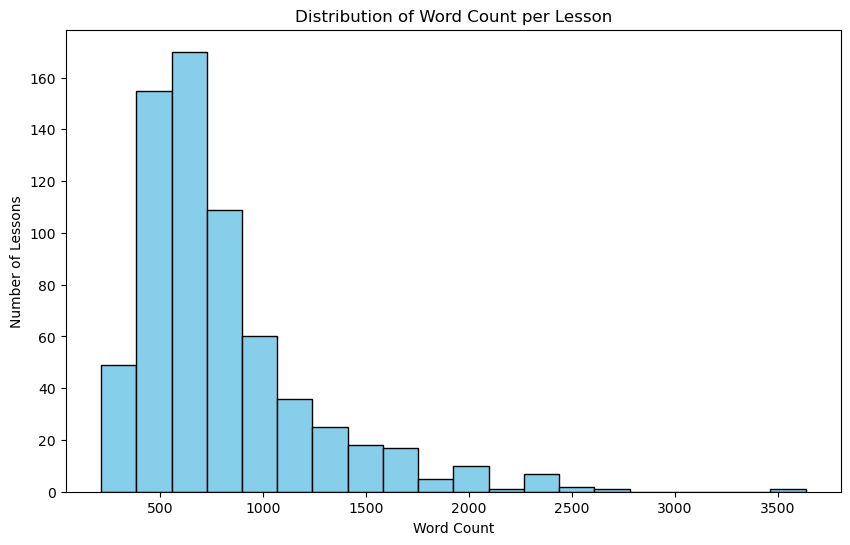

In [5]:
import os
import json
import matplotlib.pyplot as plt

# Assume extract_textbook_text(entry) is defined (as in our previous example)
# and myPath is a list of JSON file paths.
json_file = "../data/tqa_train_val_test/train/tqa_v1_train.json"
with open(json_file, 'r') as f:
    data = json.load(f)

lesson_word_counts = []
for lesson in data:
    # Extract the text for this lesson using your function
    texts = extract_textbook_text(lesson)
    full_text = " ".join(texts)
    # Count the number of words for this lesson
    word_count = len(full_text.split())
    lesson_word_counts.append(word_count)

# Plot the distribution of word counts per lesson
plt.figure(figsize=(10, 6))
plt.hist(lesson_word_counts, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Word Count per Lesson")
plt.xlabel("Word Count")
plt.ylabel("Number of Lessons")
plt.show()

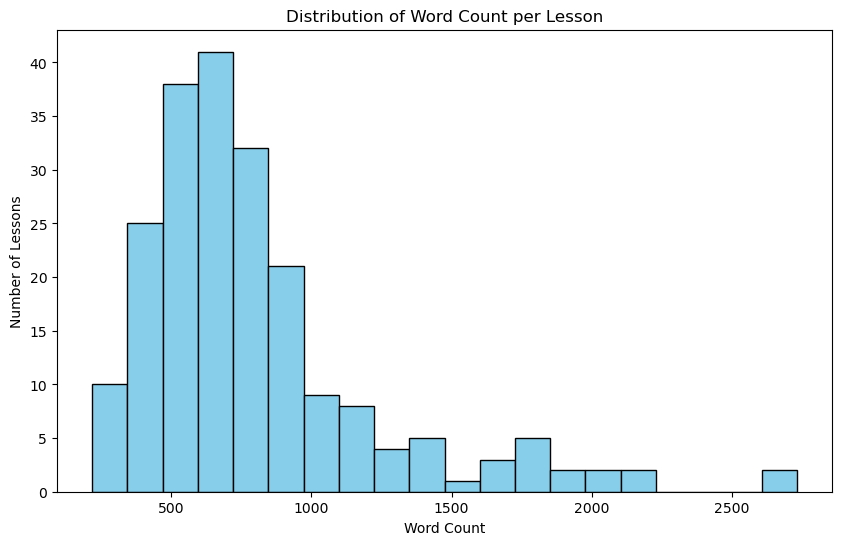

In [7]:
import os
import json
import matplotlib.pyplot as plt

# Assume extract_textbook_text(entry) is defined (as in our previous example)
# and myPath is a list of JSON file paths.
json_file = "../data/tqa_train_val_test/test/tqa_v2_test.json"
with open(json_file, 'r') as f:
    data = json.load(f)

lesson_word_counts = []
for lesson in data:
    # Extract the text for this lesson using your function
    texts = extract_textbook_text(lesson)
    full_text = " ".join(texts)
    # Count the number of words for this lesson
    word_count = len(full_text.split())
    lesson_word_counts.append(word_count)

# Plot the distribution of word counts per lesson
plt.figure(figsize=(10, 6))
plt.hist(lesson_word_counts, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Word Count per Lesson")
plt.xlabel("Word Count")
plt.ylabel("Number of Lessons")
plt.show()

In [59]:
def get_keys_structure(data, level=0):
    """Recursively extracts keys to show the hierarchical structure."""
    if isinstance(data, dict):
        for key, value in data.items():
            print("  " * level + f"- {key}")
            get_keys_structure(value, level + 1)
    elif isinstance(data, list) and len(data) > 0:
        print("  " * level + f"- (List of {len(data)} items)")
        get_keys_structure(data[0], level + 1)

print(f"Dataset Structure")
get_keys_structure(data[0])  # Check structure for one lesson

Dataset Structure
- adjunctTopics
  - Apply Concepts
    - content
      - figures
      - mediaLinks
      - text
    - orderID
  - Introduction
    - content
      - figures
      - mediaLinks
      - text
    - orderID
  - Lesson Objectives
    - content
      - figures
      - mediaLinks
      - text
    - orderID
  - Lesson Summary
    - content
      - figures
      - mediaLinks
      - text
    - orderID
  - Points to Consider
    - content
      - figures
      - mediaLinks
        - (List of 1 items)
      - text
    - orderID
  - Recall
    - content
      - figures
      - mediaLinks
      - text
    - orderID
  - Think Critically
    - content
      - figures
      - mediaLinks
      - text
    - orderID
  - Vocabulary
    - creep
    - landslide
    - mass movement
    - mudslide
    - slump
- diagramAnnotations
- globalID
- instructionalDiagrams
- lessonName
- questions
  - diagramQuestions
  - nonDiagramQuestions
    - NDQ_000201
      - answerChoices
        - a
       